# Smart Phones analysis

### Dataset link
### https://www.kaggle.com/datasets/chaudharisanika/smartphones-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns' , 50)

In [3]:
path = '../All_data_sets/practice/Smartphones_cleaned_dataset.csv'

In [4]:
df = pd.read_csv(path)

df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [5]:
df.shape

(980, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [7]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


### Total no.of unique brands

In [8]:
df['brand_name'].unique()

array(['oneplus', 'samsung', 'motorola', 'realme', 'apple', 'xiaomi',
       'nothing', 'oppo', 'vivo', 'poco', 'iqoo', 'jio', 'gionee',
       'tecno', 'tesla', 'google', 'infinix', 'cola', 'letv', 'ikall',
       'leeco', 'duoqin', 'nokia', 'lava', 'honor', 'nubia', 'redmi',
       'asus', 'itel', 'royole', 'sony', 'oukitel', 'vertu', 'blu', 'lyf',
       'huawei', 'zte', 'lenovo', 'lg', 'micromax', 'leitz', 'cat',
       'doogee', 'tcl', 'sharp', 'blackview'], dtype=object)

In [9]:
# unique brands count
len(df['brand_name'].unique())

46

## Top 10 Brands and their share in the market

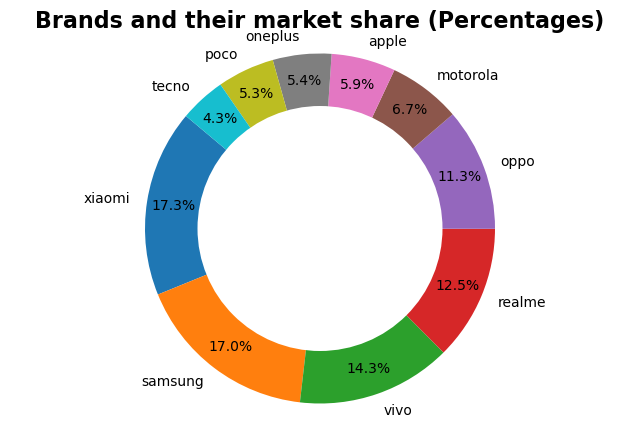

In [10]:
# Calculate counts for each brand
brand_counts = df['brand_name'].value_counts()[:10]

# Plot pie chart with percentages
plt.figure(figsize=(8, 5))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Brands and their market share (Percentages)', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [11]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


### Total no.of mobile brand entered the 5G

In [12]:
len(df[df['has_5g'] == True]['brand_name'].unique())

32

In [13]:
df[df['has_5g'] == True]['brand_name'].unique()

array(['oneplus', 'samsung', 'motorola', 'realme', 'apple', 'xiaomi',
       'nothing', 'oppo', 'vivo', 'poco', 'iqoo', 'jio', 'tecno', 'tesla',
       'google', 'infinix', 'nokia', 'lava', 'honor', 'nubia', 'asus',
       'royole', 'sony', 'redmi', 'blu', 'zte', 'lenovo', 'lg', 'huawei',
       'leitz', 'doogee', 'blackview'], dtype=object)

### Lowest and height cost of each brand mobile

In [14]:
brands = df[['brand_name', 'model', 'price', 'rating']].groupby('brand_name')

In [15]:
# Find index of lowest and highest price model per brand
idx_min_price = brands['price'].idxmin()
idx_max_price = brands['price'].idxmax()

In [16]:
# Models with lowest price per brand
lowest_price_models = df.loc[idx_min_price][['brand_name', 'model', 'price']]

# Models with highest price per brand
highest_price_models = df.loc[idx_max_price][['brand_name', 'model', 'price']]

In [17]:
lowest_price_models

,brand_name,model,price
173,apple,Apple iPhone 9,29990
556,asus,Asus ROG Phone 5s 5G,39999
959,blackview,Blackview BV5200 Pro,8990
431,blu,BLU F91 5G,14990
817,cat,CAT S22 Flip,14999
160,cola,Cola Phone,14999
962,doogee,Doogee S99,14999
190,duoqin,Duoqin F22 Pro,9990
75,gionee,Gionee G13 Pro,6190
500,google,Google Pixel 2 XL,15990


In [18]:
highest_price_models

,brand_name,model,price
288,apple,Apple iPhone 14 Pro Max (1TB),182999
699,asus,Asus ROG Phone 6D Ultimate,107990
959,blackview,Blackview BV5200 Pro,8990
431,blu,BLU F91 5G,14990
817,cat,CAT S22 Flip,14999
160,cola,Cola Phone,14999
843,doogee,Doogee V Max,45999
190,duoqin,Duoqin F22 Pro,9990
689,gionee,Gionee M12 Pro,7499
215,google,Google Pixel 7 Pro 5G,81999


### Lowest and height rating of each brand mobile

In [19]:

idx_min_rating = brands['rating'].idxmin()
idx_max_rating = brands['rating'].idxmax()

In [20]:
idx_min_rating.dropna(inplace=True)

In [21]:
idx_max_rating.dropna(inplace=True)

In [22]:

lowest_rating_models = df.loc[idx_min_rating][['brand_name', 'model', 'rating']]


highest_rating_models = df.loc[idx_max_rating][['brand_name', 'model', 'rating']]

In [23]:
lowest_rating_models

,brand_name,model,rating
262,apple,Apple iPhone XR2,60.0
452,asus,Asus ZenFone 9,86.0
959,blackview,Blackview BV5200 Pro,67.0
431,blu,BLU F91 5G,85.0
160,cola,Cola Phone,74.0
962,doogee,Doogee S99,84.0
689,gionee,Gionee M12 Pro,67.0
838,google,Google Pixel 3a XL,67.0
675,honor,Honor Play 30,68.0
844,huawei,Huawei Nova Y61,63.0


In [24]:
highest_rating_models

,brand_name,model,rating
756,apple,Apple iPhone 13 Pro Max (1TB),86.0
278,asus,Asus ROG Phone 6 Pro 5G,88.0
959,blackview,Blackview BV5200 Pro,67.0
431,blu,BLU F91 5G,85.0
160,cola,Cola Phone,74.0
843,doogee,Doogee V Max,88.0
689,gionee,Gionee M12 Pro,67.0
270,google,Google Pixel 6 Pro,89.0
420,honor,Honor 70 5G,88.0
704,huawei,Huawei Mate Xs 2,89.0


### Different types of brands and their usage

In [25]:
df['processor_brand'].unique()

array(['snapdragon', 'exynos', 'dimensity', 'bionic', 'helio', 'unisoc',
       'tiger', nan, 'google', 'sc9863a', 'spreadtrum', 'fusion', 'kirin',
       'mediatek'], dtype=object)

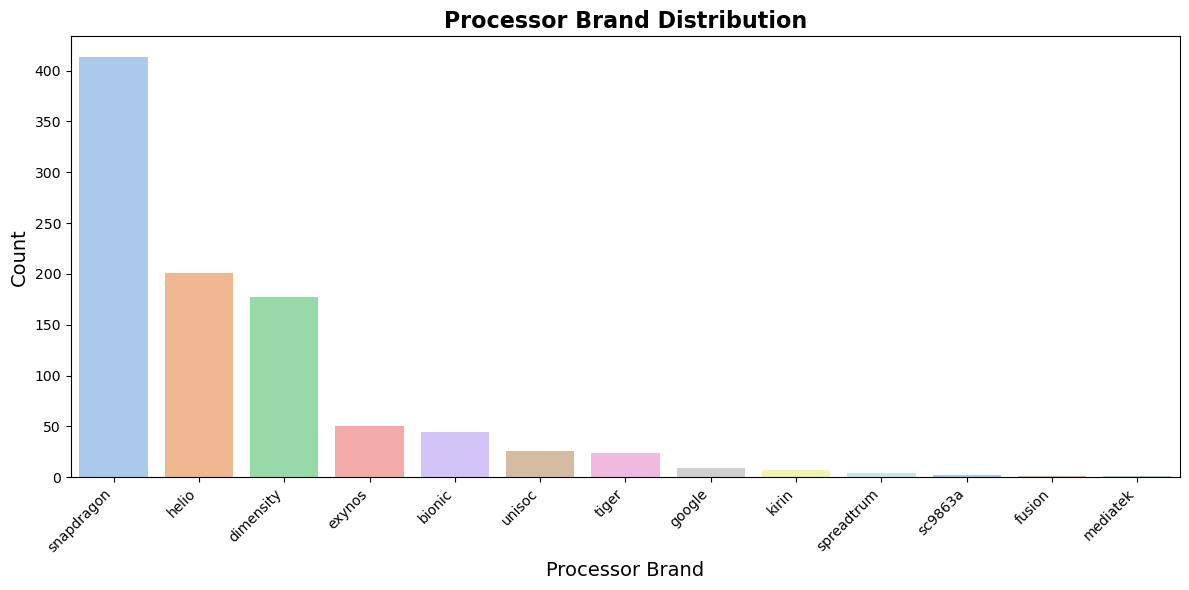

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='processor_brand', palette='pastel', order=df['processor_brand'].value_counts().index)

plt.title('Processor Brand Distribution', fontsize=16, weight='bold')
plt.xlabel('Processor Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [27]:
df['battery_capacity'].unique()

array([ 5000.,  3279.,  4980.,  4500.,  3240.,  4700.,  4830.,  4800.,
        4323.,  3110.,  5200.,  6000.,  4325.,  4600.,  4200.,  3500.,
        3095.,  4020.,  3200.,  4400.,  4310.,  4820.,  3700.,  5160.,
          nan,  5080.,  3900.,  4410.,  5020.,  2800.,  4352.,  4520.,
        4810.,  4000.,  2050.,  2150.,  4610.,  5100.,  7000.,  4300.,
        5500.,  4050.,  4355.,  3060.,  5003.,  2438.,  4250.,  3300.,
        4450.,  4614.,  4870.,  4030.,  4350.,  4100., 21000.,  4860.,
        2275.,  4230.,  1900.,  3020.,  4730.,  3520.,  4080.,  5050.,
        5600.,  4470.,  3360.,  3000.,  2230.,  9800.,  1821.,  4015.,
        3285.,  4360.,  3315.,  2000.,  3600.,  3100., 22000.,  2400.,
        2500.,  4532.,  5065.,  4620.,  4780.,  3730.,  3400.,  2730.,
        5180.,  8000.])

In [28]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

### 5G usage in market

In [29]:
df['has_5g'].value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

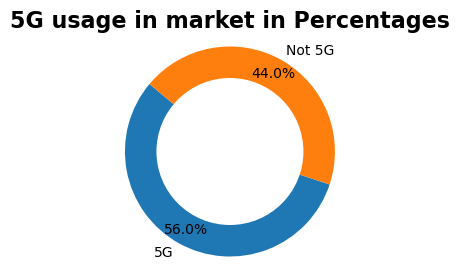

In [30]:
# Calculate counts for each brand
has_5g = df['has_5g'].value_counts()

# Plot pie chart with percentages
plt.figure(figsize=(5, 3))
plt.pie(has_5g, labels=['5G','Not 5G'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('5G usage in market in Percentages', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [31]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


### operating system used by different mobiles

In [32]:
df['os'].value_counts()

os
android    909
ios         46
other       11
Name: count, dtype: int64

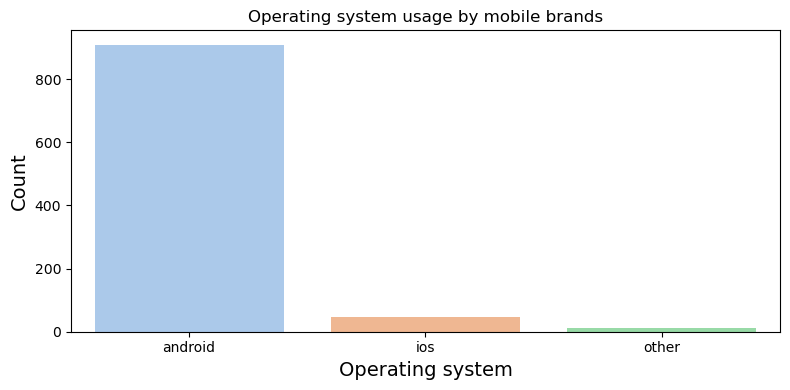

In [33]:
plt.figure(figsize=(8,4))

plt.title('Operating system usage by mobile brands')

sns.countplot( data=df , x='os',palette='pastel' )
plt.xlabel('Operating system', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

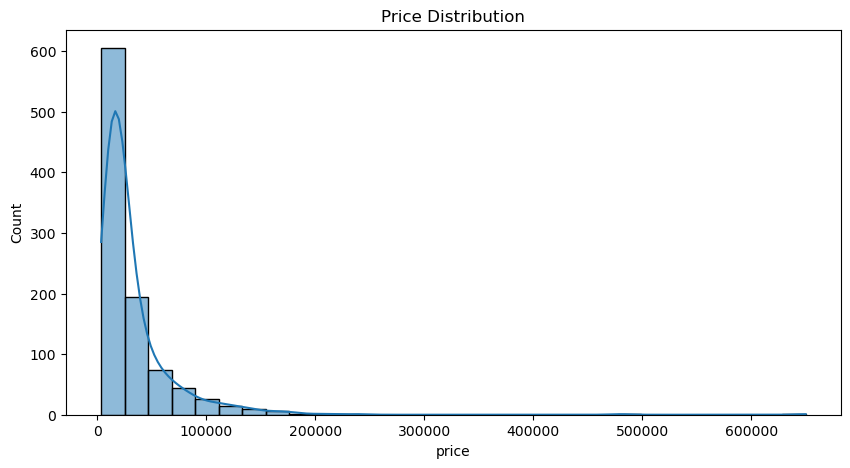

In [34]:
# Histogram example for price
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

In [35]:
# Average price by brand
avg_price_brand = df.groupby('brand_name')['price'].mean().sort_values(ascending=False)
# print("Average Price by Brand:\n", avg_price_brand)

# Average rating by brand
avg_rating_brand = df.groupby('brand_name')['rating'].mean().sort_values(ascending=False)
# print("\nAverage Rating by Brand:\n", avg_rating_brand)

# Similarly for OS
avg_price_os = df.groupby('os')['price'].mean().sort_values(ascending=False)
# print("\nAverage Price by OS:\n", avg_price_os)

### Average price of top 10 costly mobile brands

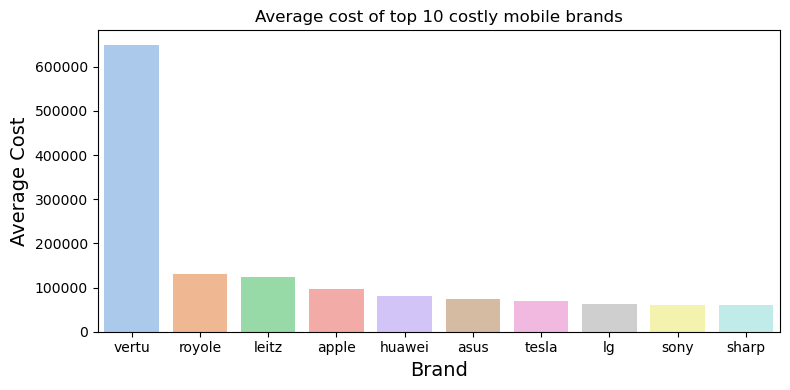

In [36]:
plt.figure(figsize=(8,4))

plt.title('Average cost of top 10 costly mobile brands')
sns.barplot( data=avg_price_brand[ :10 ] , palette='pastel' )
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Cost', fontsize=14)

plt.tight_layout()
plt.show()

### Average rating of top 10 heighest rating mobile brands

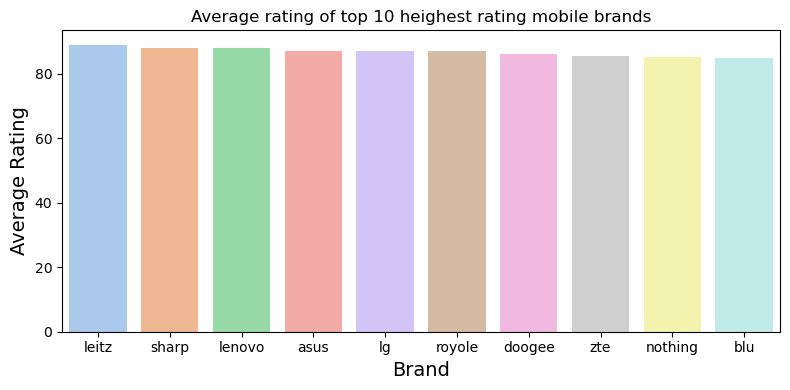

In [37]:
plt.figure(figsize=(8,4))

plt.title('Average rating of top 10 heighest rating mobile brands')
sns.barplot( data=avg_rating_brand[ :10 ] , palette='pastel' )
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

plt.tight_layout()
plt.show()

### Average Price of operating system

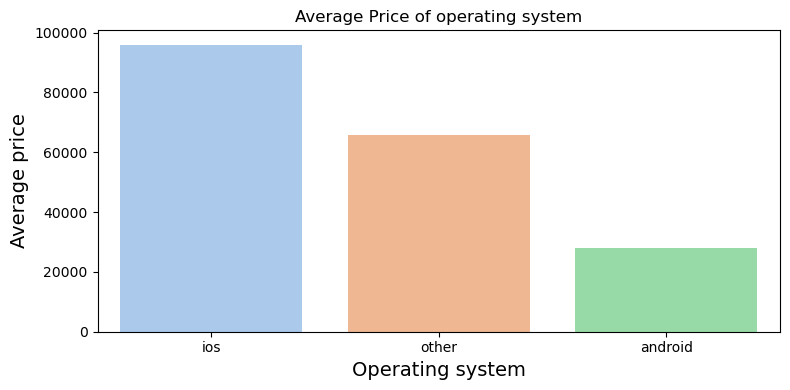

In [38]:
plt.figure(figsize=(8,4))

plt.title('Average Price of operating system')
sns.barplot( data=avg_price_os, palette='pastel' )
plt.xlabel('Operating system', fontsize=14)
plt.ylabel('Average price', fontsize=14)

plt.tight_layout()
plt.show()

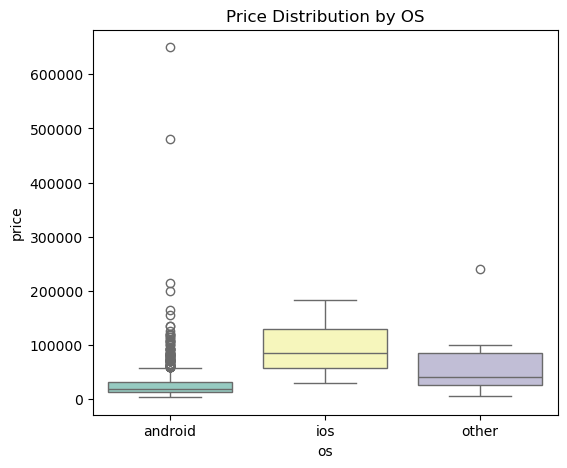

In [39]:
# Boxplot of price by OS
plt.figure(figsize=(6,5))
sns.boxplot(x='os', y='price', data=df, palette='Set3')
plt.title('Price Distribution by OS')
plt.show()

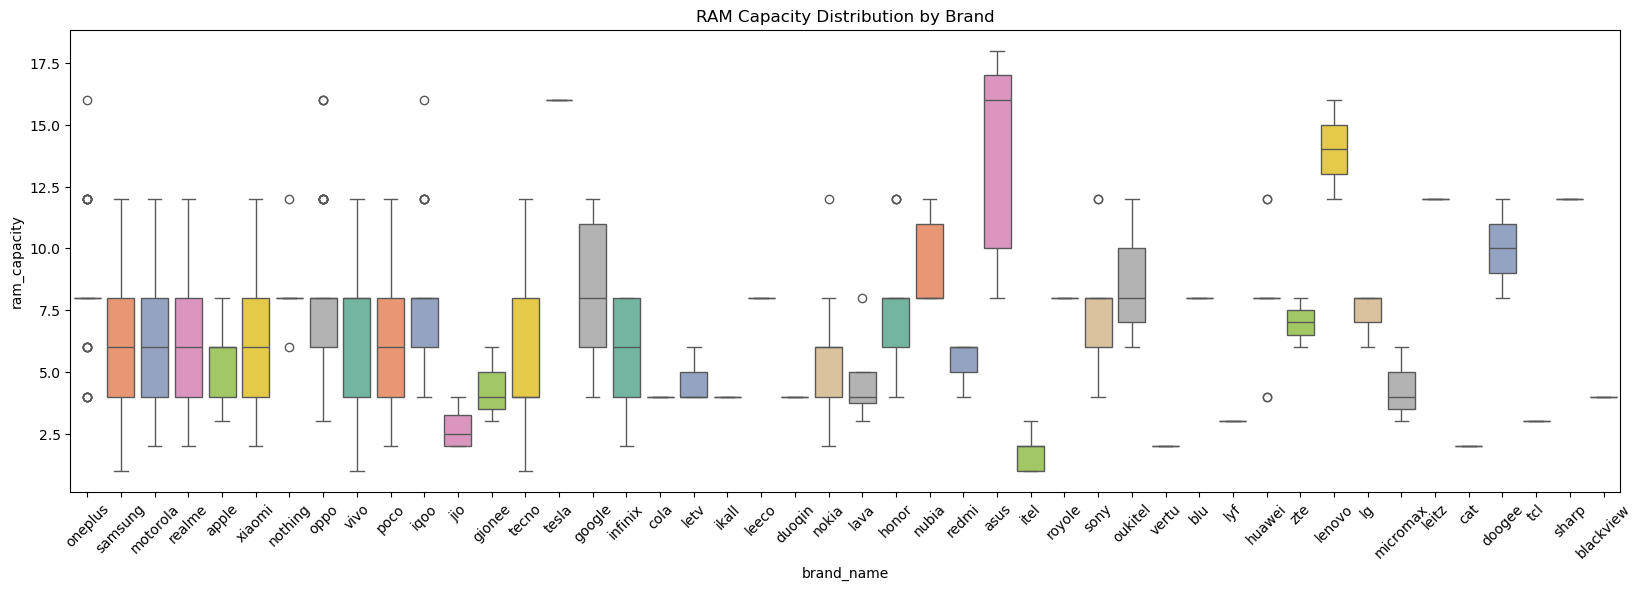

In [40]:
# Boxplot of RAM capacity by brand
plt.figure(figsize=(20,6))
sns.boxplot(x='brand_name', y='ram_capacity', data=df, palette='Set2')
plt.title('RAM Capacity Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

### Boxplots of price across categories like has_5g, has_nfc  to see feature impact visually

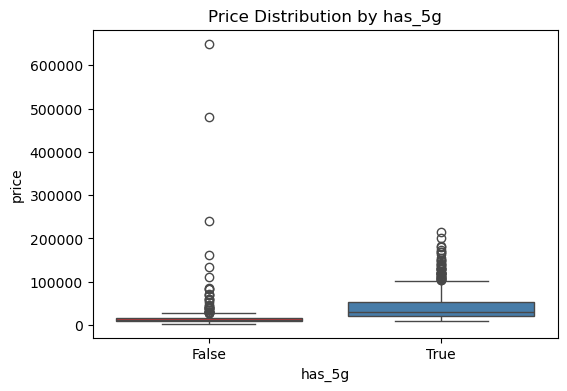

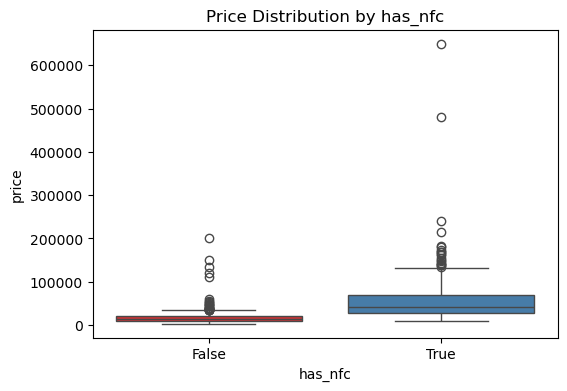

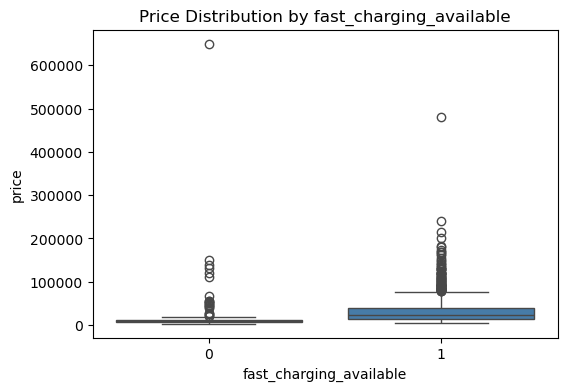

In [41]:
for feature in ['has_5g', 'has_nfc', 'fast_charging_available']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature, y='price', data=df, palette='Set1')
    plt.title(f'Price Distribution by {feature}')
    plt.show()


### Correlation matrix for continuous variables

In [42]:
numeric_cols = [col for col in df.columns if(df[col].dtype != 'O') ]

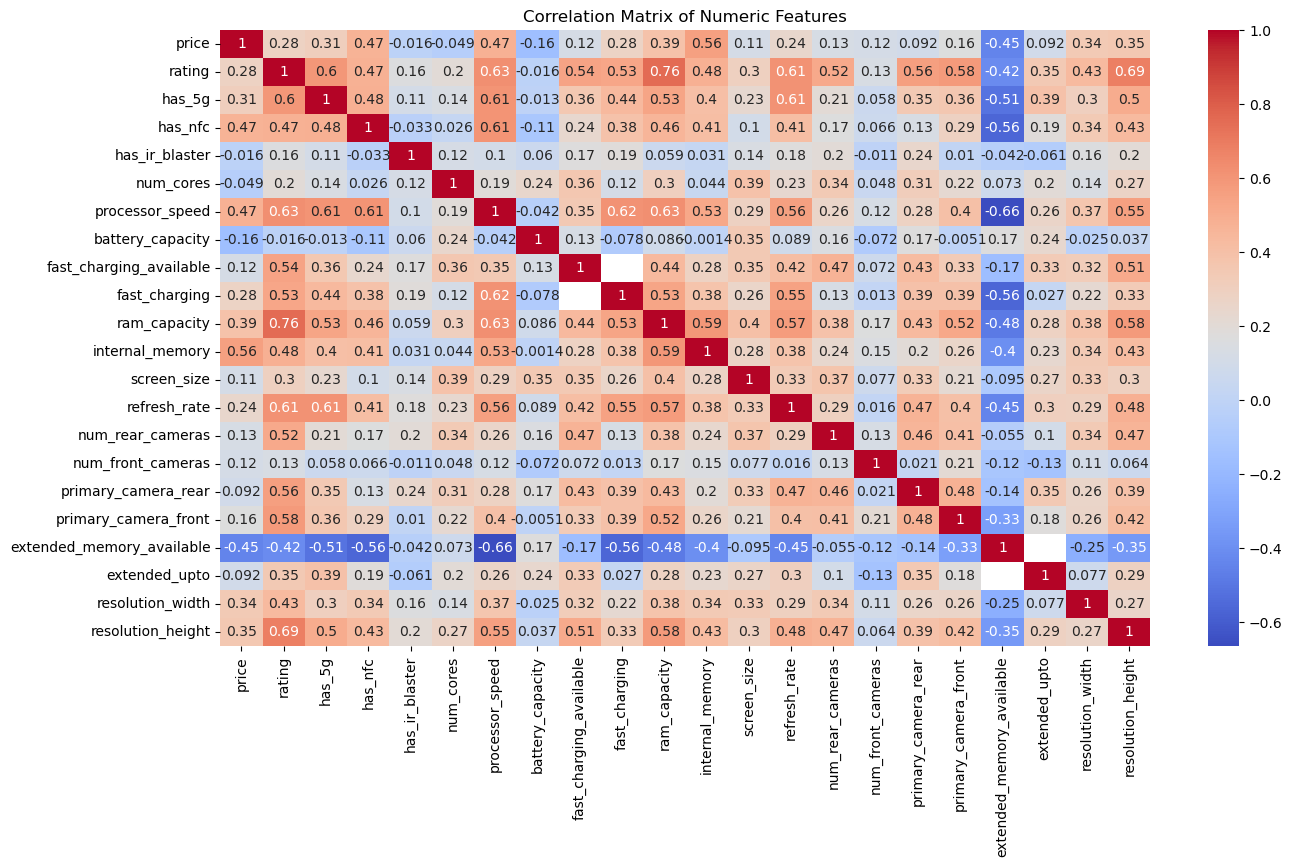

In [43]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(15,8))

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix of Numeric Features')
plt.show()
